# Reinforcement Learning

# 2. Dynamic programming

This notebook presents techniques of dynamic programming (**policy iteration, value iteration**) for the Maze.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from model import Maze
from agent import Agent
from dp import PolicyEvaluation

In [3]:
maze = Maze()
# set parameters
maze_map = np.load('maze.npy')
maze.set_parameters(maze_map, (1,0), [(1,20)])
# init
maze = Maze()

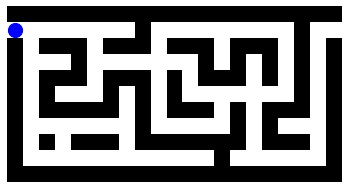

In [4]:
maze.display()

## Policy Evaluation

In [5]:
# random policy
agent = Agent(maze)

policy = agent.policy

In [10]:
algo = PolicyEvaluation(maze, policy, gamma=1)
values = algo.values
algo??

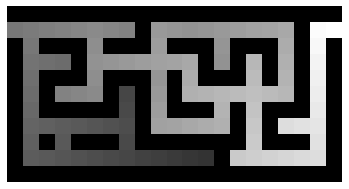

In [11]:
maze.display_values(values)

In [12]:
policy = algo.improve_policy()

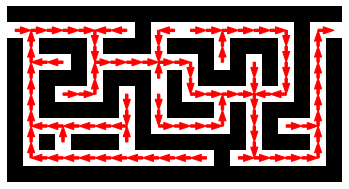

In [15]:
maze.display_policy(policy)

In [16]:
def get_action(policy, state):
    """Action for a deterministic policy."""
    probs, actions = policy(state)
    return actions[0]

In [17]:
def get_path(policy, n_step=100):
    """Get path in the maze."""
    maze.init_state()
    state = maze.state
    states = [state]
    for t in range(n_step):
        action = get_action(policy, state)
        _, states_ = maze.get_transition(state, action)
        state = states_[0]
        states.append(state)
        if maze.is_terminal(state):
            break
    return states

In [18]:
states = get_path(policy)

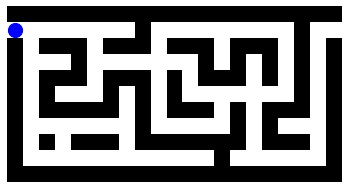

In [19]:
animation = maze.display(states)

In [20]:
animation

## Policy Iteration

In general, several iterations are necessary. Below is the Policy Iteration method.

In [21]:
class PolicyIteration(PolicyEvaluation):
    """Policy iteration."""
    
    def __init__(self, environment, gamma=1, n_iter_eval=100, n_iter=100):
        agent = Agent(environment)
        policy = agent.policy
        self.n_iter = n_iter
        super(PolicyIteration, self).__init__(environment, policy, gamma, n_iter_eval)   

    def evaluate_policy(self):
        self.get_transition_matrix()
        self.get_values()        
    
    def is_same_policy(self, policy):
        for state in self.states:
            if get_action(policy, state) != get_action(self.policy, state):
                return False
        return True
        
    def get_policy(self):
        for t in range(self.n_iter):
            policy = self.improve_policy()
            if self.is_same_policy(policy):
                break
            self.policy = policy
            self.evaluate_policy()
        return policy

In [22]:
algo = PolicyIteration(maze)

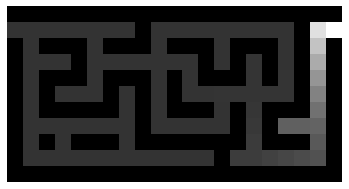

In [23]:
values = algo.values
maze.display_values(values)

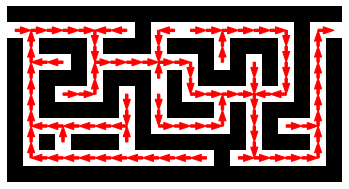

In [24]:
policy = algo.get_policy()
maze.display_policy(policy)

## Value Iteration

## To do

* Implement and test Value Iteration.

In [40]:
class ValueIteration(PolicyEvaluation):
    """Value iteration."""
    
    def __init__(self, environment, gamma=1, n_iter=100, target_error=0.01):
        agent = Agent(environment)
        policy = agent.policy
        super(ValueIteration, self).__init__(environment, policy, gamma)  
        self.n_iter = n_iter
        self.target_error = target_error
   
    def get_policy(self):
        values = self.init_values()
        binary_matrix = self.transition_matrix > 0
        nb_actions = binary_matrix.sum(axis=1)
        for t in range(self.n_iter):
            values_prev = values.copy()
            # bellman's optimality equation
            # to be completed
            values = binary_matrix @ (self.policy.get_reward() + gamma * values_prev)
            values = np.amax(values, axis = 1)
                
            relative_error = np.sum(np.abs(values - values_prev))
            if np.sum(np.abs(values)):
                relative_error /= np.sum(np.abs(values))
            if relative_error < self.target_error:
                break
        self.values = values
        policy = self.improve_policy()
        return policy

In [41]:
algo = ValueIteration(maze)

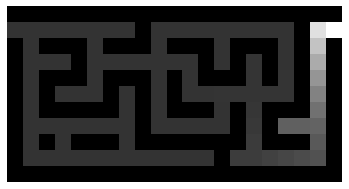

In [42]:
values = algo.values
maze.display_values(values)

In [43]:
policy = algo.get_policy()
maze.display_policy(policy)

AttributeError: 'function' object has no attribute 'get_reward'